Tarea 5



....


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ignorar advertencias
import warnings

In [207]:
df = pd.read_csv('C:/Users/AranzaEstebanAvalos/Documents/AA - ML_docs/df2_loan.csv',low_memory=False)
warnings.filterwarnings('ignore')

In [189]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,purpose,addr_state,earliest_cr_line,open_acc,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,default_ind,sub_grade_encoded,credit_history
0,5000.0,36.0,10.65,162.87,1.0,6.0,10.0,24000.0,1.0,3.0,5479.0,3.0,5831.78,861.07,16436.0,171.62,16801.0,11322.0,6.0,11322.0
1,2500.0,60.0,15.27,59.83,2.0,13.0,0.0,30000.0,0.0,10.0,10595.0,3.0,1008.71,435.17,15709.0,119.66,15714.0,5267.0,13.0,5267.0
2,2400.0,36.0,15.96,84.33,2.0,14.0,10.0,12252.0,11.0,14.0,11333.0,2.0,3003.65,603.65,16076.0,649.91,16801.0,5174.0,14.0,5174.0
3,10000.0,36.0,13.49,339.31,2.0,10.0,10.0,49200.0,9.0,4.0,9497.0,10.0,12226.30,2209.33,16436.0,357.48,16436.0,6909.0,10.0,6909.0
4,3000.0,60.0,12.69,67.79,1.0,9.0,1.0,80000.0,9.0,37.0,9496.0,15.0,3242.17,1009.07,16801.0,67.79,16801.0,7305.0,9.0,7305.0


In [208]:
X = df.drop('loan_amnt', axis=1)
y = df['loan_amnt']

-------------------------

Arboles de Decisión

Se partio con arboles de decisión en base a los resultados Tarea4 (no supervisado)

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenando un modelo 
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = decision_tree_regressor.predict(X_test)

# Evaluando el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(428.82236516575955, 1658.2637214915014, 0.9627484639622839)

In [210]:
columnas = ['MSE', 'RMSE', 'R2']
resultados = pd.DataFrame()
resultados = pd.DataFrame({' ': columnas, 'Arboles': [mae, rmse,r2]});resultados

,,Arboles
0,MSE,428.822365
1,RMSE,1658.263721
2,R2,0.962748


Regression Linear

Se considero regression linea para evaluar los resultados y poder comparar los resultados con Arboles de decision para corroborar si Arboles es el metodo optimo

In [213]:
from sklearn.linear_model import LinearRegression

# Entrenando un modelo de Regresión Lineal
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_linear = linear_regressor.predict(X_test)

# Evaluando el modelo de regresión lineal
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

resultados['Regresion'] = [mae_linear, rmse_linear,r2_linear];resultados


,,Arboles,Regresion
0,MSE,428.822365,877.750903
1,RMSE,1658.263721,1672.686004
2,R2,0.962748,0.962098


In [214]:
# Calculando métricas para el conjunto de entrenamiento - Árbol de Decisión
y_train_pred_tree = decision_tree_regressor.predict(X_train)
mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
rmse_train_tree = mean_squared_error(y_train, y_train_pred_tree, squared=False)
r2_train_tree = r2_score(y_train, y_train_pred_tree)

# Calculando métricas para el conjunto de entrenamiento - Regresión Lineal
y_train_pred_linear = linear_regressor.predict(X_train)
mae_train_linear = mean_absolute_error(y_train, y_train_pred_linear)
rmse_train_linear = mean_squared_error(y_train, y_train_pred_linear, squared=False)
r2_train_linear = r2_score(y_train, y_train_pred_linear)

# Empaquetando los resultados en un diccionario para facilitar la comparación
train_metrics = {
    "Árbol de Decisión": {"MAE": mae_train_tree, "RMSE": rmse_train_tree, "R2": r2_train_tree},
    "Regresión Lineal": {"MAE": mae_train_linear, "RMSE": rmse_train_linear, "R2": r2_train_linear}
}

train_metrics


{'Árbol de Decisión': {'MAE': 0.0, 'RMSE': 0.0, 'R2': 1.0},
 'Regresión Lineal': {'MAE': 848.5520409539729,
  'RMSE': 1571.3630008655155,
  'R2': 0.9656071162847043}}

**Árbol de Decisión**

_Entrenamiento:_ Observamos que las predicciones se ajustan perfectamente a los valores reales, lo que refleja el sobreajuste.

_Prueba:_ Aunque el ajuste es bueno, no es perfecto, lo que indica una pérdida de generalización.

**Regresión Lineal**

_Entrenamiento:_ Hay una buena correspondencia entre las predicciones y los valores reales, pero no es perfecta, lo que es normal.

_Prueba:_ El ajuste es similar al del conjunto de entrenamiento, lo que sugiere que el modelo está generalizando bien.

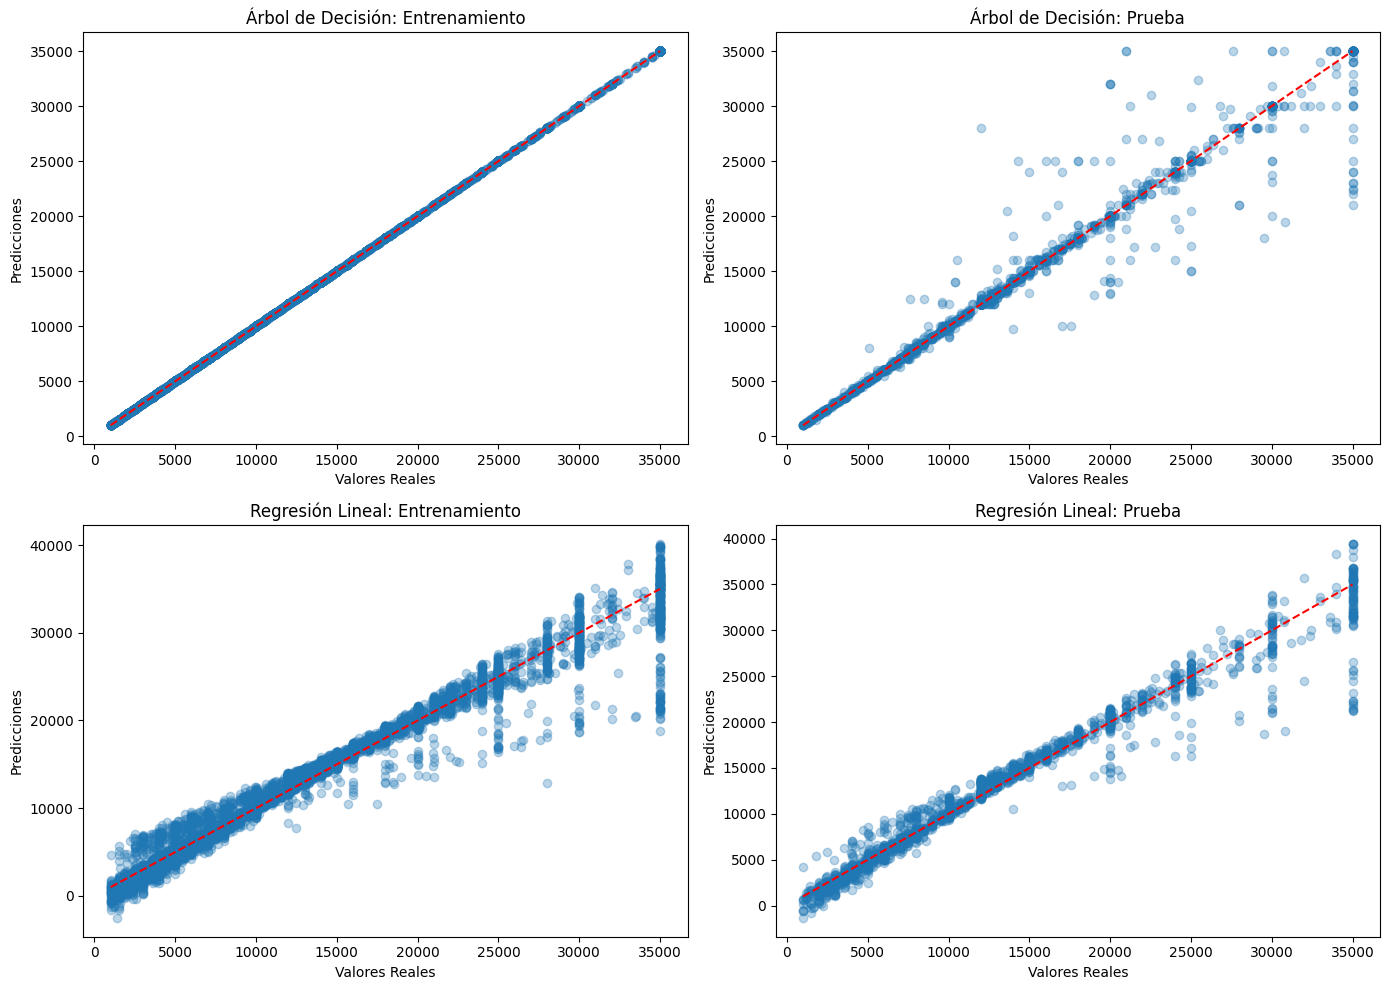

In [215]:

def plot_predictions_vs_actual(y_true, y_pred, title, ax):
    ax.scatter(y_true, y_pred, alpha=0.3)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    ax.set_xlabel('Valores Reales')
    ax.set_ylabel('Predicciones')
    ax.set_title(title)

# Creando figuras para los gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Árbol de Decisión
plot_predictions_vs_actual(y_train, y_train_pred_tree, 'Árbol de Decisión: Entrenamiento', axs[0, 0])
plot_predictions_vs_actual(y_test, y_pred, 'Árbol de Decisión: Prueba', axs[0, 1])

# Regresión Lineal
plot_predictions_vs_actual(y_train, y_train_pred_linear, 'Regresión Lineal: Entrenamiento', axs[1, 0])
plot_predictions_vs_actual(y_test, y_pred_linear, 'Regresión Lineal: Prueba', axs[1, 1])

plt.tight_layout()
plt.show()


Se puede identificar que para el Árbol de Decisión muestran un claro sobreajuste, como se evidencia por el ajuste perfecto en los datos de entrenamiento y la disminución en el rendimiento en los datos de prueba.

En contraste, los gráficos de la Regresión Lineal muestran un comportamiento más consistente entre los conjuntos de entrenamiento y prueba, lo que indica un buen equilibrio entre el ajuste y la capacidad de generalización.

Fuentes

- (Arboles de decición) [https://scikit-learn.org/stable/modules/tree.html]
- (Regression) [https://scikit-learn.org/stable/modules/tree.html#regression]
- (Regression: ejemplo) [https://github.com/PabloRR100/Curso-Machine-Learning-Esp/blob/master/4%20-%20Aprendizaje%20Supervisado/4.1.%20Regresi%C3%B3n/4.1.2%20-%20Regresi%C3%B3n%20Linear%20y%20Polin%C3%B3mica/4.1.1.1%20RLS%20-%20Python.ipynb]